In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [26]:
def load_datasets(filename, data_columns, target_column): #читає вхідний файл
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [27]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [28]:
def decision_boundary(X, y, mean, std, theta):
   
    plot_data(X,y)
    threshold=0.5
    x_1_min = X.values[:,0].min()
    x_1_max = X.values[:,0].max()
    x_2_min = X.values[:,1].min()
    x_2_max = X.values[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x_1_min, x_1_max, 100), np.linspace(x_2_min, x_2_max, 100))
    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    X_pred = pd.DataFrame(X_pred,columns=[X.columns[0],X.columns[1]])
    pred = h(prepare_X((X_pred-mean)/std),theta)
    Z = pred.reshape((100, 100))
    ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1_min, x_1_max))
    ax.set_ylim((x_2_min, x_2_max))

In [29]:
def normalize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_new = (X-mean)/std
    return X_new, mean, std

In [30]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [31]:
def sigmoid(z):
    #z - вектор стовпець
    g = 1/(1+np.exp(z*-1))
    return g

In [32]:
def h(X, theta):
    # X - матриця
    # theta - вектор
    z = X.dot(theta)
    return sigmoid(z)

In [33]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = sum(-1*y*np.log(h(X,theta)) + (1-y)*np.log(1-h(X,theta)) )/m;
    return J

In [34]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = X_new.T.dot(h(X_new,theta) -y_new)/m;
    
    return d_theta

In [35]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X,y,theta);
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta -= alpha* derivative_theta(X,y,theta);
        
        J = cost_function(X,y,theta);
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [36]:
def predict(X, mean, std, theta):
    res = h(prepare_X((X-mean)/std),theta)
    predictions = [(1 if i>0.5 else 0) for i in res]
    return predictions

In [37]:
#основна частина
data_columns = ["exam1", "exam2"] 
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


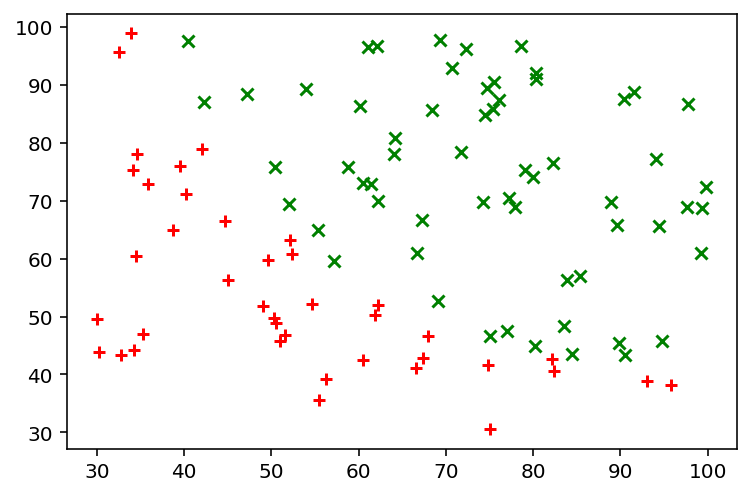

In [38]:
plot_data(X, y)

In [39]:
X_new, mean, std = normalize(X)

In [40]:
X_new = prepare_X(X_new)
y=y.to_numpy();
y_new = y.reshape((X.shape[0], 1))

In [41]:
theta = np.zeros((X_new.shape[1], 1))

In [42]:
cost_function(X_new, y_new, theta)

array([0.13862944])

In [43]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 100000, False)
print(new_theta,"\n",len(Js))

[[1.66354876]
 [3.87571811]
 [3.61186153]] 
 41481


In [44]:
cost_function(X_new, y_new, new_theta)

array([-0.02081803])

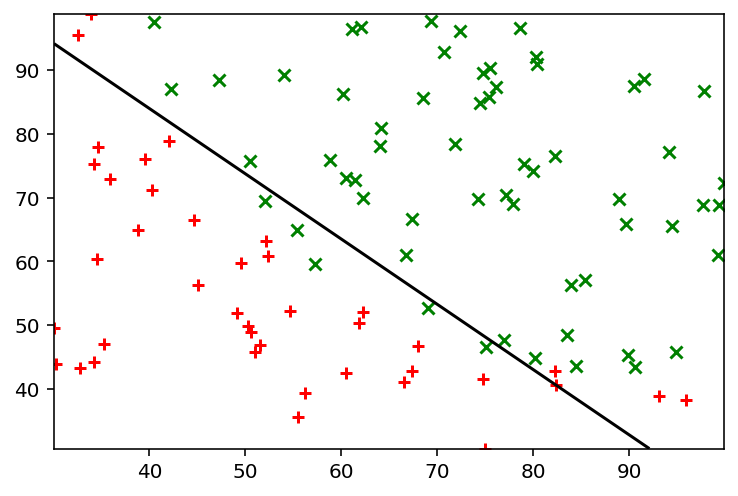

In [45]:
decision_boundary(X, y, mean, std, new_theta)

In [46]:
T = pd.DataFrame(np.array([[40, 40], [60, 65],[50,70],[85,40]]),columns=[X.columns[0],X.columns[1]])
print(predict(T, mean, std, new_theta))

[0, 1, 0, 1]


In [47]:
accuracy_score(predict(X, mean, std, new_theta), y)

0.89